In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("galaxy_distances.csv")
df = df.drop(0, axis=0)
df = df.replace("-", np.nan)
df['distance'] = pd.to_numeric(df['distance'])
df['velocity'] = pd.to_numeric(df['velocity'])


Hubble's law states that v = Hd.
v is the relative velocity between galaxies or other distant objects.
d is the distance between them.
Based on a linear regression of sample data H =  75.53963379577081 (km/s)/Mpc


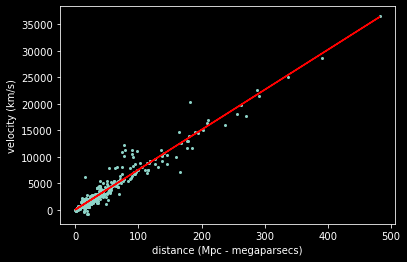

In [3]:
from sklearn import linear_model
df = df.dropna()
dist = df['distance'].values.reshape(-1,1)
vel = df['velocity'].values.reshape(-1,1)

linreg = sk.linear_model.LinearRegression()
linreg.fit(dist, vel)
fit = linreg.predict(dist)

plt.style.use('dark_background')
plt.plot(dist, fit, c='red')
plt.scatter(dist, vel, s=4)
plt.xlabel('distance (Mpc - megaparsecs)')
plt.ylabel('velocity (km/s)')

hubble = float(linreg.coef_)
print('Hubble\'s law states that v = Hd.')
print('v is the relative velocity between galaxies or other distant objects.')
print('d is the distance between them.')
print('Based on a linear regression of sample data H = ', hubble, '(km/s)/Mpc')
